In [1]:
import pandas as pd
import numpy as np 

In [2]:
df= pd.read_csv("flatsloc")

In [3]:
df.head()

,Unnamed: 0,Location,Price,Price per m2,Size M2,Rooms,Latitude,Longitude
0,0,"Warszawa, Praga-Północ",396000.0,13655.0,29.0,2,52.264884,21.027344
1,1,"Warszawa, Bemowo, ul. Secemińska",695000.0,11564.0,60.1,3,NaN,NaN
2,2,"Warszawa, Wilanów",828000.0,15055.0,55.0,2,52.153083,21.110441
3,3,"Warszawa, Białołęka",730000.0,13225.0,55.2,3,52.331566,21.020619
4,4,"Warszawa, Śródmieście, ul. Marszałkowska 111a",750000.0,19330.0,38.8,2,NaN,NaN


In [4]:
import geopy.distance

centrum  = (52.2297, 21.0122)
coords = (52.264884,21.027344)

print (geopy.distance.geodesic(centrum, coords).km)
dystans= []
df["Coordinates"] = df[["Latitude", "Longitude"]].apply(lambda x: ", ".join(x.astype(str)), axis=1)
df.head()

4.049321821278573


,Unnamed: 0,Location,Price,Price per m2,Size M2,Rooms,Latitude,Longitude,Coordinates
0,0,"Warszawa, Praga-Północ",396000.0,13655.0,29.0,2,52.264884,21.027344,"52.2648843, 21.0273442"
1,1,"Warszawa, Bemowo, ul. Secemińska",695000.0,11564.0,60.1,3,NaN,NaN,"nan, nan"
2,2,"Warszawa, Wilanów",828000.0,15055.0,55.0,2,52.153083,21.110441,"52.1530829, 21.1104411"
3,3,"Warszawa, Białołęka",730000.0,13225.0,55.2,3,52.331566,21.020619,"52.3315662, 21.0206194"
4,4,"Warszawa, Śródmieście, ul. Marszałkowska 111a",750000.0,19330.0,38.8,2,NaN,NaN,"nan, nan"


In [5]:
import geopy.distance

# Coordinates of the center of Warsaw
centrum = (52.2319, 21.0067)

# Remove rows with nan values from the DataFrame
df_clean = df.dropna(subset=["Latitude", "Longitude"])

# Create an empty list to store the distances
distances = []

# Iterate over the rows in the "Latitude" and "Longitude" columns
for i, cord in df_clean[["Latitude", "Longitude"]].iterrows():
    # Calculate the distance between the center of Warsaw and the coordinate
    distance = geopy.distance.geodesic(centrum, (cord["Latitude"], cord["Longitude"])).km
    
    # Add the distance to the list
    distances.append(distance)

# Add the distances to a new column in the DataFrame
df_clean["Distance"] = distances

C:\Users\Bartosz\AppData\Local\Temp\ipykernel_15768\2085839145.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["Distance"] = distances


In [6]:
# Prepare Data Frame to correlation
df_regresion = df_clean[["Size M2", "Rooms", "Coordinates","Distance","Price"]]

<AxesSubplot:>

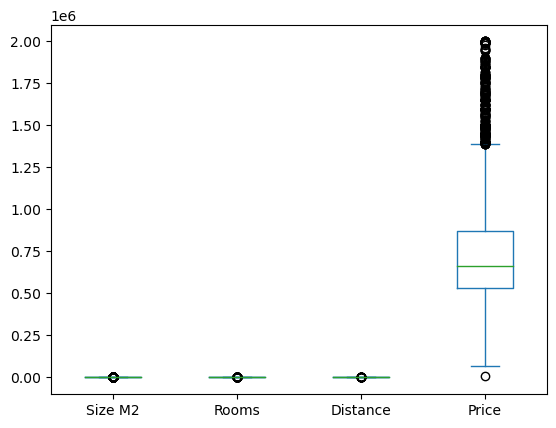

In [7]:
#  Outliers check 
df_regresion.head()
df_regresion_2 = df_regresion["Price"]<=2000000
df_regresion_2= df_regresion[df_regresion_2]
df_regresion_2.plot(kind="box")


In [8]:
df_regresion.describe()

,Size M2,Rooms,Distance,Price
count,4650.000000,4650.000000,4650.000000,4.650000e+03
mean,61.236957,2.595054,5.980950,1.006719e+06
std,34.408520,0.977977,3.177912,3.658420e+06
min,10.000000,1.000000,0.006685,5.900000e+03
25%,42.000000,2.000000,3.736103,5.390000e+05
50%,53.315000,3.000000,5.690971,6.836675e+05
75%,68.860000,3.000000,8.079394,9.400000e+05
max,487.000000,10.000000,16.533322,1.999636e+08


In [ ]:
#Describe our DF 

<AxesSubplot:>

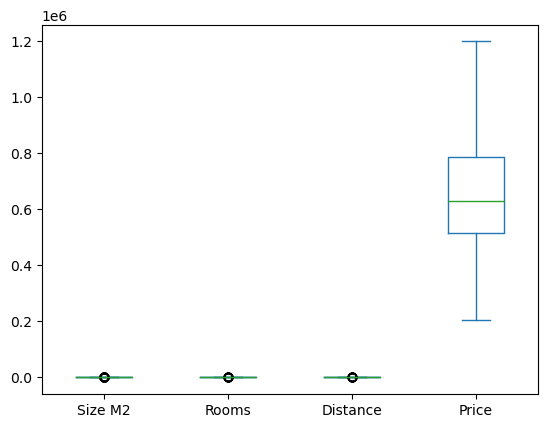

In [9]:

query= df_regresion.query("Price <=1200000 & Price >= 150000" )

query.describe()
query.plot(kind="box")
                                                 

As we can see we do not have ouliers in 150000 - 1200000 Range 

<AxesSubplot:>

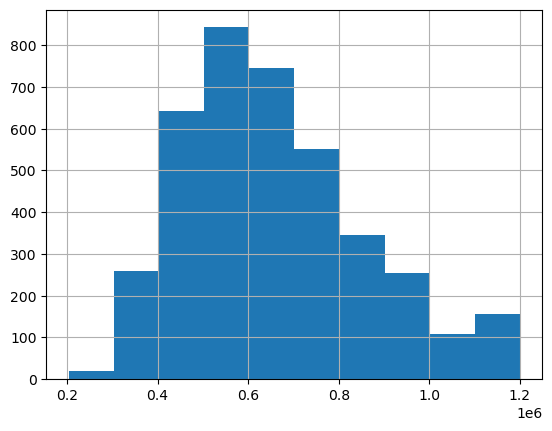

In [10]:
query["Price"].hist()

In [11]:
x=query[["Size M2","Rooms","Distance"]]
y=query["Price"]

In [12]:
from sklearn.model_selection import train_test_split 

In [13]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=1)

In [14]:
df_cor = X_train.copy()
df_cor["Price"]= y_train.values


<AxesSubplot:>

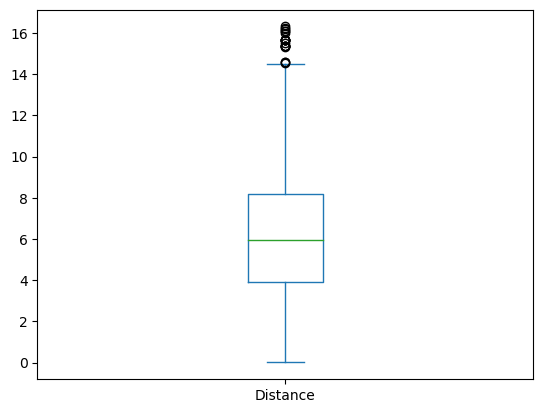

In [15]:
df_cor["Distance"].plot(kind="box")

<AxesSubplot:>

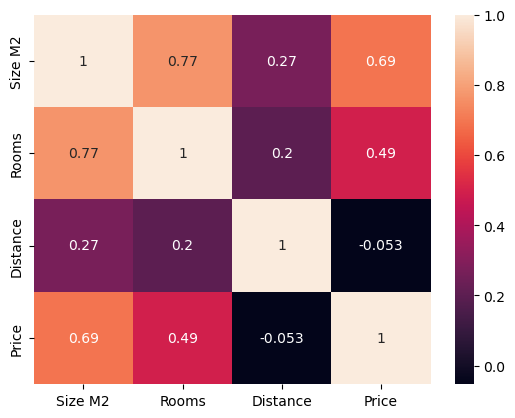

In [16]:
import seaborn as sns
cor= df_cor.corr()
sns.heatmap(cor,annot=True)


It's surprise for me but distance has not influenced to price 

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
model= LinearRegression()
model.fit(X=X_train, y= y_train)


LinearRegression()

In [19]:
pred_train= model.predict(X_train)
pred_test = model.predict(X_test)

In [20]:
import matplotlib.pyplot as plt 

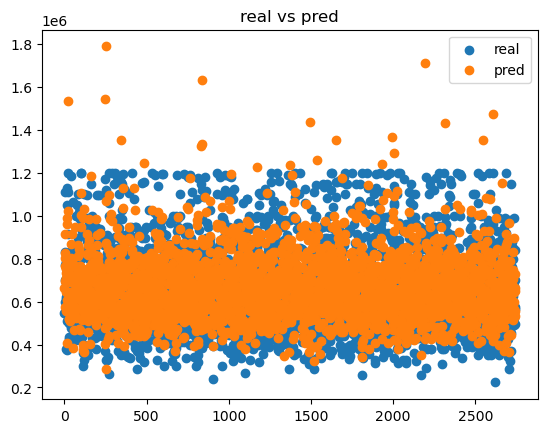

In [21]:
x_range= list(range(len (pred_train)))
plt.scatter(x_range,y_train)
plt.scatter(x_range,pred_train)
#min_y = min(y_train)
#plt.ylim(min_y, 5)
plt.title("real vs pred")
plt.legend(["real","pred"])
#rmse,mse, r2 score 

DDD

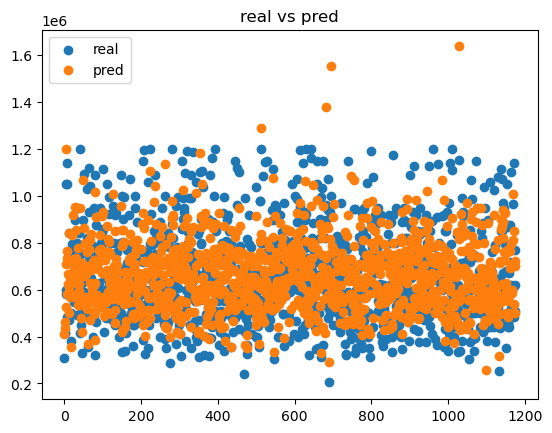

In [22]:
x_range2= list(range(len (pred_test)))
plt.scatter(x_range2,y_test)
plt.scatter(x_range2,pred_test)
#min_y = min(y_train)
#plt.ylim(min_y, 5)
plt.title("real vs pred")
plt.legend(["real","pred"])
#rmse,mse, r2 score 

In [23]:
mse = np.mean((y_train - pred_train)**2)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:",rmse)

MSE: 18619367052.27075
RMSE: 136452.80155522915


MSE - (Mean Squared Error) value is 18619367052.27075. MSE is a measure of the average square difference between predictions and actual values in a sample. The higher the MSE value, the greater the average deviation between predictions and actual values, indicating that the model has poorer prediction quality.

RMSE- The RMSE (Root Mean Squared Error) value is 136452.80155522915. RMSE is the square root of the MSE and is used to measure the average prediction error in the same units as the predicted value. The higher the RMSE value, the greater the average difference between predictions and actual values.



In [25]:
from sklearn.metrics import r2_score
r2=r2_score(y_train,pred_train)
print(r2)

0.546120013297984
